
### Web Scraping, Sentiment Analysis, Text Mining & Visualization for Steam

### Steam Videogame Reviews & Information

<br>

<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/c/c1/Steam_2016_logo_black.svg" width="200" alt="Steam Logo">
</center>

<br>

## 🏆 Objectives

* Acquire data about videogames on Steam, such as prices and reviews.
* Having the reviews of a game, apply sentiment analysis to understand if the reviews are positive or negative, using only the text on the review.
* Extract relevant data from Steam as:
  - The most popular games at the moment.
  - The tags and genres of the most popular games on Steam at the moment.
* Basic text mining to find popular words.
* Generation of Pandas CSV Datasets from Scraping results.
* Ploting and Data Visualization.


## 📚 Material

Libraries used:
* ***requests***: This library allows you to consult information from pages on the Internet.
* ***lxml***: Python library that will allow filtering information in html files (web page format) with "XPATH" language.
* ***nltk***: *(Natural Language ToolKit)* Library from Python that contains Models for Natural Language Analysis, which allows us to analyze words through algorithms.
* ***pandas***: Library to magae datasets in CSV and aother formats.
* ***matplotlib***: Python library to plot data.
* ***numpy***: Math library to help in plotting.


## Web Scraping

When triggering the search, Steam sends us to a new page, with a url that follows the following logic:

* **HTTPS:** "*https://*"
* **BASE URL:** "*store.steampowered.com"*
* **SEARCH:** "*/search/?term="*
* **NAME OF THE VIDEO GAME WE ARE LOOKING FOR:** "*Plants+vs.+Zombies*" (But replacing the spaces with "+" symbol).

Let's try to guess the URL for Undertale Game:

***https://store.steampowered.com/search/?term=Undertale+Game*** 👀

In [19]:
# You have to install mentioned libraries for scraping;
# Do the following command to install "requests" & "lxml":
!pip install requests lxml

In [20]:
# First we have to import the mentioned libraries:
import requests
import lxml.html as html

In [21]:
# Let's create the url variable in which will search Plants vs. Zombies

# Steam base url:
url_base = "https://store.steampowered.com/search/?term="

# The game to search:
game_name = "Plants vs Zombies"

print(url_base)
print(game_name)

https://store.steampowered.com/search/?term=
Plants vs Zombies


In [22]:
# If we want to replace the "spaces" in the name of the game to put in the url;
# "replace" method help us to change the " " for "+"
game_url = game_name.replace(" ", "+")
game_url

'Plants+vs+Zombies'

In [23]:
# Concatenate the Steam base url & the Game search url:
search_url = url_base + game_url

print("The url to search the game is:", search_url)

The url to search the game is: https://store.steampowered.com/search/?term=Plants+vs+Zombies


In [24]:
# Lets go to the url to search the game:
# This line will make a request to the url to get the page like an internet navigator:
steam_search_page = requests.get(search_url)

# Then try to get the content as on the page as text with a format "utf-8" (to get special symbols like "´"):
content = steam_search_page.content.decode("utf-8")

# We convert the content into an object from the lxml.html library in order to extract information from it:
steam_html = html.fromstring(content)

# Print the content of the page to see what we are getting:
print(content)

<!DOCTYPE html>
<html class=" responsive" lang="en">
<head>
	<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">
			<meta name="viewport" content="width=device-width,initial-scale=1">
		<meta name="theme-color" content="#171a21">
		<title>Steam Search</title>
	<link rel="shortcut icon" href="/favicon.ico" type="image/x-icon">

	
	
	<link href="https://store.akamai.steamstatic.com/public/shared/css/motiva_sans.css?v=Rc2hpzg2Ex3T&amp;l=english" rel="stylesheet" type="text/css" >
<link href="https://store.akamai.steamstatic.com/public/shared/css/shared_global.css?v=MIg0pk6GiDqL&amp;l=english" rel="stylesheet" type="text/css" >
<link href="https://store.akamai.steamstatic.com/public/shared/css/buttons.css?v=6PFqex5UPprb&amp;l=english" rel="stylesheet" type="text/css" >
<link href="https://store.akamai.steamstatic.com/public/css/v6/store.css?v=ogn9Hq_3cC99&amp;l=english" rel="stylesheet" type="text/css" >
<link href="https://store.akamai.steamstatic.com/public/css/v6/browse.

In [25]:
# Building and executing xpath expressions;
# REMEBER TO PUTH EACH EXPRESSION ON SINGLE QUOTES AS THIS:
# '//div[@class="example"]'

# XPATH Examples:
xpath_to_get_game_names = '//div[@id="search_resultsRows"]//span[@class="title"]/text()'
xpath_to_get_images_url = '//div[@id="search_resultsRows"]//div[@class="col search_capsule"]//img/@src'
xpath_to_get_games_urls = '//div[@id="search_resultsRows"]/a/@href'

# Executing the XPATH queries to get data:
# REMEMBER THAT "steam_html" IS THE HTML WE PREVIOUSLY GOT;
games = steam_html.xpath(xpath_to_get_game_names)
games_images = steam_html.xpath(xpath_to_get_images_url)
games_urls = steam_html.xpath(xpath_to_get_games_urls)

# Prints the results of data:
print("By searching", game_name)
print("\nGames found:", games)
print("\nGames images:", games_images)
print("\nGames urls:", games_urls)

By searching Plants vs Zombies

Games found: ['Plants vs. Zombies GOTY Edition', 'Plants vs. Zombies™ Garden Warfare 2: Deluxe Edition', 'Plants vs. Zombies Demo', 'Plants vs. Zombies: Battle for Neighborville™', 'Plants vs. Zombies: Battle for Neighborville™ Season’s Eatingz Upgrade', 'Battle Ranch: Pigs vs Plants', '人类VS怪物(Human vs Monster)', 'Elves vs Goblins Defender', 'The Knight Witch', 'Octogeddon', 'The Territory of Egg', 'Bazaar', "Traveler's Bastion", 'Monster Tiles TD', 'Taddle Quest', 'I, Zombie', 'Farm for your Life', 'Candy Disaster - Tower Defense', 'Supermagical', 'Crypto: Against All Odds - Tower Defense', 'Bad Egg', 'Space Tyrant', 'Hardhat Wombat', 'Windy Kingdom', 'Mostly Intense Monster Defense', 'Dungeon Warfare', 'SYNCHRONIZERS: UNDEAD MARINES', 'Viscera Cleanup Detail - Soundtrack', 'Magic Siege - Defender', 'Cats on Duty', 'Aegis Defenders', 'Two Worlds II Castle Defense', "Axis Game Factory's AGFPRO v3", 'Tower Defense - Fantasy Legends Tower Game', 'McDROID',

In [26]:
# This code is to show each element on the lists, but prints only the first five games:
for number in range(5):
  print(f"\n[{number}]\n{games[number]}\n{games_images[number]}\n{games_urls[number]}")


[0]
Plants vs. Zombies GOTY Edition
https://cdn.akamai.steamstatic.com/steam/apps/3590/capsule_sm_120.jpg?t=1615390608
https://store.steampowered.com/app/3590/Plants_vs_Zombies_GOTY_Edition/?snr=1_7_7_151_150_1

[1]
Plants vs. Zombies™ Garden Warfare 2: Deluxe Edition
https://cdn.akamai.steamstatic.com/steam/apps/1922560/capsule_sm_120.jpg?t=1652720468
https://store.steampowered.com/app/1922560/Plants_vs_Zombies_Garden_Warfare_2_Deluxe_Edition/?snr=1_7_7_151_150_1

[2]
Plants vs. Zombies Demo
https://cdn.akamai.steamstatic.com/steam/apps/3592/capsule_sm_120.jpg?t=1447351833
https://store.steampowered.com/app/3590/Plants_vs_Zombies_GOTY_Edition/?snr=1_7_7_151_150_1

[3]
Plants vs. Zombies: Battle for Neighborville™
https://cdn.akamai.steamstatic.com/steam/apps/1262240/capsule_sm_120.jpg?t=1614957327
https://store.steampowered.com/app/1262240/Plants_vs_Zombies_Battle_for_Neighborville/?snr=1_7_7_151_150_1

[4]
Plants vs. Zombies: Battle for Neighborville™ Season’s Eatingz Upgrade
https:

https://store.steampowered.com/app/3590/Plants_vs_Zombies_GOTY_Edition/?snr=1_7_7_151_150_1


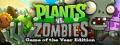

In [27]:
# First game in search:
selected_game = 0
game_url = games_urls[selected_game]
print(game_url)

# THIS IS ONLY TO SHOW THE GAME IMAGE HERE IN Jupyter Notebook;
# YOU CAN IGNORE IT IF YOU WANT:
from IPython.display import Image
Image(games_images[selected_game].split(".jpg")[0] + ".jpg")

Let's access the most recent reviews of the game:
We already have the URL of the game, we only need to replace after the part of **"*/app/3590/*",** with the filter of **"*reviews/?browsefilter=mostrecent*"** to see the most recent reviews. But look at how the domain changes; it is not **"*store.steampowered*"**, it is **"*steamcommunity.com*"**.

In [28]:
# Getting the most recent reviews game url:
print("Game URL:", game_url)
# https://store.steampowered.com/app/3590/Plants_vs_Zombies_GOTY_Edition/?snr=1_7_7_151_150_1...

# Divides the url in every "/" symbol:
split_url = game_url.split("/")
print(split_url)

# Creates a new URL using the splitted parts:
# For "https://store.steampowered.com/app/3590/Plants_vs_Zombies_GOTY_Edition/?snr=1_7_7_151_150_1":
# [0]: "https:"
# [1]: ""
# [2]: "store.steampowered.com" this has to be "steamcomunity.com"
# [3]: "app"
# [4]: "3590"
# [5]: ...
reviews_url = "https://steamcommunity.com/" + split_url[3] + "/" + split_url[4] + "/reviews/?browsefilter=mostrecent"
print("\nReviews URL:", reviews_url)

Game URL: https://store.steampowered.com/app/3590/Plants_vs_Zombies_GOTY_Edition/?snr=1_7_7_151_150_1
['https:', '', 'store.steampowered.com', 'app', '3590', 'Plants_vs_Zombies_GOTY_Edition', '?snr=1_7_7_151_150_1']

Reviews URL: https://steamcommunity.com/app/3590/reviews/?browsefilter=mostrecent


In [29]:
# Gets the page of the selected game:
reviews_page = requests.get(reviews_url)

# Then try to get the content on the page with a format "utf-8" to get special symbols like "´":
content = reviews_page.content.decode("utf-8")

# We convert the content into an object from the lxml.html library in order to extract information from it:
reviews_html = html.fromstring(content)

# Gets he reviews:
# THIS USES DIRECTLY THE XPATH TO GET THE LATEST REVIEWS; TRY TO PRACTICING FINDING AN EXPRESSION BY YOURSELF;
# EACH review tells how many hours the user has been playing the game when doing the review.
xpath_to_get_reviews = '//div[@class="apphub_UserReviewCardContent"]//div[@class="apphub_CardTextContent"]/text()[2]'
xpath_to_get_reviews_playing_hours = '//div[@class="reviewInfo"]//div[@class="hours"]/text()'

# Executes the XPATH to get the data:
reviews = reviews_html.xpath(xpath_to_get_reviews)
hours = reviews_html.xpath(xpath_to_get_reviews_playing_hours)

# Cleans the data; sometimes the data comes with a lot of spaces or tabs;
# It takes all the tabs "\t", the line scapes "\n" and the double spaces "  ", and replaces with nothing:
for number in range(len(reviews)):

  reviews[number] = reviews[number].replace("  ", "")
  reviews[number] = reviews[number].replace("\t", "")
  reviews[number] = reviews[number].replace("\n", "")

  hours[number] = hours[number].replace("  ", "")
  hours[number] = hours[number].replace("\t", "")
  hours[number] = hours[number].replace("\n", "")

# Prints the reviews:
print(f"LATEST REVIEWS OF {games[selected_game]} [{len(reviews)}]:\n")

# Prints each review with the amount of hours:
for number in range(len(reviews)):
  print(f"Review [{number+1}]:")
  print(reviews[number])
  print(hours[number])
  print("__________________________________________________\n")


LATEST REVIEWS OF Plants vs. Zombies GOTY Edition [10]:

Review [1]:
Always been there to soil my plants! ^^
7.3 hrs on record
__________________________________________________

Review [2]:
great old game still makes fun
17.3 hrs on record
__________________________________________________

Review [3]:
Fun and at the same time challenging game!
9.2 hrs on record
__________________________________________________

Review [4]:
u said da zombies are doing WHAT?!
18.7 hrs on record
__________________________________________________

Review [5]:
El plantas vs zombies god original antes de lo compraran los pay to win de EA
4.7 hrs on record
__________________________________________________

Review [6]:
yes good
59.0 hrs on record
__________________________________________________

Review [7]:
good game
6.8 hrs on record
__________________________________________________

Review [8]:
when the zombies are coming
31.4 hrs on record
__________________________________________________

Review [9

# Sentiment Analysis

By naving a list of reviews for a product and using Language Models, we can distinguish whether those are positive or negatives reviews (ignoring the stars of the rating and only considering the text).

Import the necessary modules for performing sentiment analysis. The nltk module is the Natural Language Toolkit, and SentimentIntensityAnalyzer is a class within the nltk.sentiment module that provides a pre-trained model for sentiment analysis.

In [30]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

Download the VADER lexicon, which is a pre-trained sentiment analysis model provided by NLTK. It contains a list of words and their sentiment scores, which will be used for analyzing the sentiment of the reviews.

In [31]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

This is a function called analyze_sentiment that takes a review as input and returns True if the sentiment is positive and False otherwise. Inside the function, we create an instance of the SentimentIntensityAnalyzer class. Then, we use this analyzer to calculate the sentiment scores of the review. The sentiment scores represent the positivity, negativity, and neutrality of the review. We check the compound score, which represents an overall sentiment score. If the compound score is greater than 0, we consider the sentiment as positive.

In [32]:
def analyze_sentiment(review):
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(review)

    if sentiment_scores["compound"] > 0:
      is_negative_sentiment = False
    else:
      is_negative_sentiment = True

    return is_negative_sentiment

Each review represents a customer's opinion about a game. The code then iterates over each review in the list, calls the analyze_sentiment function to determine its sentiment, and prints whether the review is positive or negative based on the sentiment result.

In [33]:
# We already have a list of reviews from Plants vs. Zombies:
for number in range(len(reviews)):

    print(f"Review [{number+1}]:")
    print(reviews[number])

    is_negative_sentiment = analyze_sentiment(reviews[number])

    if is_negative_sentiment:
        print("❌ Negative review;")
    else:
        print("✅ Positive review;")
    print("________________________________________________________\n")

Review [1]:
Always been there to soil my plants! ^^
❌ Negative review;
________________________________________________________

Review [2]:
great old game still makes fun
✅ Positive review;
________________________________________________________

Review [3]:
Fun and at the same time challenging game!
✅ Positive review;
________________________________________________________

Review [4]:
u said da zombies are doing WHAT?!
❌ Negative review;
________________________________________________________

Review [5]:
El plantas vs zombies god original antes de lo compraran los pay to win de EA
✅ Positive review;
________________________________________________________

Review [6]:
yes good
✅ Positive review;
________________________________________________________

Review [7]:
good game
✅ Positive review;
________________________________________________________

Review [8]:
when the zombies are coming
❌ Negative review;
________________________________________________________

Review [9]:
ba

## Statistics & Analysis

### 📊 What are the most popular categories and genres at the moment in video games?

Let's answer that question. What would we need to know first?

1. What are the most popular games at the moment?
2. What tags do these games contain?
3. What is their genre? 

By knowing that we can find out which are the most popular categories and/or genres at the moment.

In [34]:
# We get all the games names and urls for the url to filter the best sellers:
topsellers_page = requests.get("https://store.steampowered.com/search/?filter=topsellers")
content = topsellers_page.content.decode("utf-8")
topsellers_html = html.fromstring(content)

# Gets the games names and urls:
games_names = topsellers_html.xpath('//div[@id="search_resultsRows"]//span[@class="title"]/text()')
games_urls = topsellers_html.xpath('//div[@id="search_resultsRows"]/a/@href')

# Showing the result it gets:
print(games_names)
print(games_urls)

# For each game url it goes to the page and extracts the tags and the genres:
topsellers = []
for number in range(len(games_names)):

  # Creates an structure to save all the games data:
  game_info = {
      "name": games_names[number],
      "url": games_urls[number],
  }

  # Try -Except is a function that allows to try to do something, and if it has an error,
  # the code will not crash; it will do the "except":
  try:
    # Go to the game url and makes scraping:
    game_page = requests.get(games_urls[number])
    content = game_page.content.decode("utf-8")
    game_html = html.fromstring(content)

    # Xpath to get tags and genres:
    tags = game_html.xpath('//div[@class="glance_tags popular_tags"]//a/text()')
    genres = game_html.xpath('//div[@id="genresAndManufacturer"]//span//a//text()')

    # Clean the data, removing the spaces, \t, \n, \r on the texts:
    for i in range(len(tags)):
      tags[i] = tags[i].replace(" ", "")
      tags[i] = tags[i].replace("\t", "")
      tags[i] = tags[i].replace("\n", "")
      tags[i] = tags[i].replace("\r", "")
    for i in range(len(genres)):
      genres[i] = genres[i].replace(" ", "")
      genres[i] = genres[i].replace("\t", "")
      genres[i] = genres[i].replace("\n", "")
      genres[i] = genres[i].replace("\r", "")

    # Saves the getted tags and genres on main_info:
    game_info["tags"] = tags
    game_info["genres"] = genres
    game_info["tags_string"] = " ".join(tags)
    game_info["genres_string"] = " ".join(genres)
    topsellers.append(game_info)

    print("Correctly analyzed", games_names[number])

  except Exception as error:
    print("Error while getting info from", games_urls[number])
    print(error)


['PAYDAY 3', 'Steam Deck', 'Cyberpunk 2077', 'Counter-Strike: Global Offensive', 'Cyberpunk 2077: Phantom Liberty', 'Party Animals', "Baldur's Gate 3", 'Mortal Kombat 1', 'Resident Evil 4', 'Starfield', 'Resident Evil 4 - Separate Ways', 'Apex Legends™', 'Lies of P', 'Lost Ark', 'EA SPORTS FC™ 24', 'Call of Duty®', 'Moonstone Island', 'War Thunder', 'Madden NFL 24', 'Destiny 2', "Tom Clancy's Rainbow Six® Siege", 'The Elder Scrolls® Online', 'Black Desert', 'Call of Duty®: Black Ops III', 'Steam Deck Docking Station', 'ARMORED CORE™ VI FIRES OF RUBICON™', 'Planet Zoo', 'Rust', 'Red Dead Redemption 2', 'The Sims™ 4', 'Party Animals - Deluxe Pack', 'Team Fortress 2', 'Conan Exiles', 'Warframe', 'Dead by Daylight', 'Mega Man Battle Network Legacy Collection Vol. 1', 'Valve Index® Headset', 'Grand Theft Auto V', 'FINAL FANTASY XIV Online', 'NBA 2K24', 'FINAL FANTASY VII REMAKE INTERGRADE', 'Sekiro™: Shadows Die Twice - GOTY Edition', 'Sea of Thieves 2023 Edition', 'MONSTER HUNTER RISE', 'C

In [35]:
# Lest's print all the data we collected and saved into a csv dataset:
# We will use "pandas" library to save the games info as a csv dataset.
import pandas as pd

# Printing and saving each in a row:
for topsell in topsellers:
  print(topsell, "\n")


{'name': 'PAYDAY 3', 'url': 'https://store.steampowered.com/app/1272080/PAYDAY_3/?snr=1_7_7_7000_150_1', 'tags': ['Heist', 'Co-op', 'Action', 'Crime', 'FPS', 'Multiplayer', 'Shooter', 'Tactical', 'America', 'Stealth', 'DarkHumor', 'OnlineCo-Op', 'RPG', 'First-Person', 'GunCustomization', 'PvE', 'Combat', '3D', "Shoot'EmUp", 'Realistic'], 'genres': ['Action', 'Adventure', 'RPG'], 'tags_string': "Heist Co-op Action Crime FPS Multiplayer Shooter Tactical America Stealth DarkHumor OnlineCo-Op RPG First-Person GunCustomization PvE Combat 3D Shoot'EmUp Realistic", 'genres_string': 'Action Adventure RPG'} 

{'name': 'Steam Deck', 'url': 'https://store.steampowered.com/app/1675200/Steam_Deck/?snr=1_7_7_7000_150_1', 'tags': [], 'genres': [], 'tags_string': '', 'genres_string': ''} 

{'name': 'Cyberpunk 2077', 'url': 'https://store.steampowered.com/app/1091500/Cyberpunk_2077/?snr=1_7_7_7000_150_1', 'tags': ['Cyberpunk', 'OpenWorld', 'Nudity', 'RPG', 'Singleplayer', 'Sci-fi', 'Futuristic', 'FPS',

### NOW WE HAVE A LIST OF THE MOST POPULAR GAMES ON STEAM, AND A LIST OF WORD TAGS AND GENRES FOR EACH ONE. LET'S SAVE THEM IN A DATASET TO BE ABLE TO ANALYZE IT. LET'S USE "Pandas".

We have now a list called "topsells" in which every element looks like this:


```json
{
  "name": "Marvel’s Spider-Man: Miles Morales",

  "url": "https://store.steampowered.com/app/1817190 Marvels_SpiderMan_Miles_Morales/?snr=1_7_7_7000_150_1",

  "tags": ['Action', 'OpenWorld', 'Superhero', 'Adventure', 'Singleplayer', 'ThirdPerson', 'Combat', 'Exploration', 'Parkour', 'StoryRich', 'Action-Adventure', 'ComicBook', 'Stealth', "Beat'emup", 'Beautiful', 'Multiplayer', 'Mature', 'RPG', 'GreatSoundtrack', 'Sci-fi'],

  "genres": ['Action', 'Adventure'],

  "tags_string": "Action OpenWorld Superhero Adventure Singleplayer ThirdPerson Combat Exploration Parkour StoryRich Action-Adventure ComicBook Stealth Beat'emup Beautiful Multiplayer Mature RPG GreatSoundtrack Sci-fi",
  
  "genres_string": "Action Adventure"
}
```

**Let's create a DataFrame (a table).**

In [36]:
# Structure of the csv:
df = pd.DataFrame(columns=["game", "game_url", "tags_string", "genres_string"])

# For each game in the list of topsellers:
for game in topsellers:

  # Add as a new row:
  row_to_add = pd.DataFrame([(
      game["name"],
      game["url"],
      game["tags_string"],
      game["genres_string"],
  )],
  columns=["game", "game_url", "tags_string", "genres_string"])

  # Adds to the DataFrame
  df = pd.concat([df, row_to_add], ignore_index=True)

# Show the DataFrame:
print(df)

# Saves it in a file called "Steam_Most_Popular_Games_2023.csv":
df.to_csv("Steam_Most_Popular_Games_2023.csv", index=False)

                                                game  \
0                                           PAYDAY 3   
1                                         Steam Deck   
2                                     Cyberpunk 2077   
3                   Counter-Strike: Global Offensive   
4                    Cyberpunk 2077: Phantom Liberty   
5                                      Party Animals   
6                                    Baldur's Gate 3   
7                                    Mortal Kombat 1   
8                                    Resident Evil 4   
9                                          Starfield   
10                   Resident Evil 4 - Separate Ways   
11                                     Apex Legends™   
12                                         Lies of P   
13                                          Lost Ark   
14                                  EA SPORTS FC™ 24   
15                                     Call of Duty®   
16                                  Moonstone Is

**Let's check the amount of times each category and each genre is repeated on the dataset, to know which are the most popular tags:**

In [37]:
# This is the way to get the data from a csv file:
data = pd.read_csv("Steam_Most_Popular_Games_2023.csv")

# We will get all the tags as separated, independent to the game, only counting the amount of times that each word appears:
# This gets each row in the column "tags_string";
# Each value is a String with the tags separated with spaces:
for game_tags in data["tags_string"]:
  print(game_tags)

Heist Co-op Action Crime FPS Multiplayer Shooter Tactical America Stealth DarkHumor OnlineCo-Op RPG First-Person GunCustomization PvE Combat 3D Shoot'EmUp Realistic
nan
Cyberpunk OpenWorld Nudity RPG Singleplayer Sci-fi Futuristic FPS Mature StoryRich First-Person Atmospheric Exploration Action Violent GreatSoundtrack ActionRPG Adventure CharacterCustomization ImmersiveSim
FPS Shooter Multiplayer Competitive Action Team-Based eSports Tactical First-Person PvP OnlineCo-Op Co-op Strategy Military War Difficult Trading Realistic Fast-Paced Moddable
RPG SexualContent Violent Gore Cyberpunk StoryRich OpenWorld Nudity Atmospheric FPS Singleplayer Action First-Person ActionRPG Shooter ChoicesMatter Stealth CharacterCustomization
Casual Funny Multiplayer Cute PartyGame Action Fighting PvP Co-op Party FamilyFriendly Physics Indie OnlineCo-Op 4PlayerLocal 3DFighter LocalMultiplayer Team-Based LocalCo-Op Action-Adventure
RPG ChoicesMatter CharacterCustomization StoryRich Adventure CRPG Turn-Based

In [38]:
# Lets separate all the tags in a list:
data["tags_string"] = data["tags_string"].astype(str)

# Join and split the tags:
all_tags = " ".join(data["tags_string"]).split()

# NOW WE HAVE A REALLY BIG LIST OF TAGS; WE HAVE TO USE TEXT-MINNIGN TECHNIQUES TO ANALYSE THEM.
# Python is powerfull to it:
print(all_tags)

['Heist', 'Co-op', 'Action', 'Crime', 'FPS', 'Multiplayer', 'Shooter', 'Tactical', 'America', 'Stealth', 'DarkHumor', 'OnlineCo-Op', 'RPG', 'First-Person', 'GunCustomization', 'PvE', 'Combat', '3D', "Shoot'EmUp", 'Realistic', 'nan', 'Cyberpunk', 'OpenWorld', 'Nudity', 'RPG', 'Singleplayer', 'Sci-fi', 'Futuristic', 'FPS', 'Mature', 'StoryRich', 'First-Person', 'Atmospheric', 'Exploration', 'Action', 'Violent', 'GreatSoundtrack', 'ActionRPG', 'Adventure', 'CharacterCustomization', 'ImmersiveSim', 'FPS', 'Shooter', 'Multiplayer', 'Competitive', 'Action', 'Team-Based', 'eSports', 'Tactical', 'First-Person', 'PvP', 'OnlineCo-Op', 'Co-op', 'Strategy', 'Military', 'War', 'Difficult', 'Trading', 'Realistic', 'Fast-Paced', 'Moddable', 'RPG', 'SexualContent', 'Violent', 'Gore', 'Cyberpunk', 'StoryRich', 'OpenWorld', 'Nudity', 'Atmospheric', 'FPS', 'Singleplayer', 'Action', 'First-Person', 'ActionRPG', 'Shooter', 'ChoicesMatter', 'Stealth', 'CharacterCustomization', 'Casual', 'Funny', 'Multiplaye

In [39]:
# Create a Pandas Series with the tags and their respective counts:
tag_counts = pd.Series(all_tags).value_counts()

# This are THE MOST POPULAR TAGS IN 2023 VIDEOGAMES:
print(tag_counts)

Action                39
Singleplayer          32
Multiplayer           31
Co-op                 24
Atmospheric           21
                      ..
2DFighter              1
Hentai                 1
Capitalism             1
Football(American)     1
GamesWorkshop          1
Length: 196, dtype: int64


In [40]:
# Library to plot data:
import matplotlib.pyplot as plt

# Library to do maths:
import numpy as np

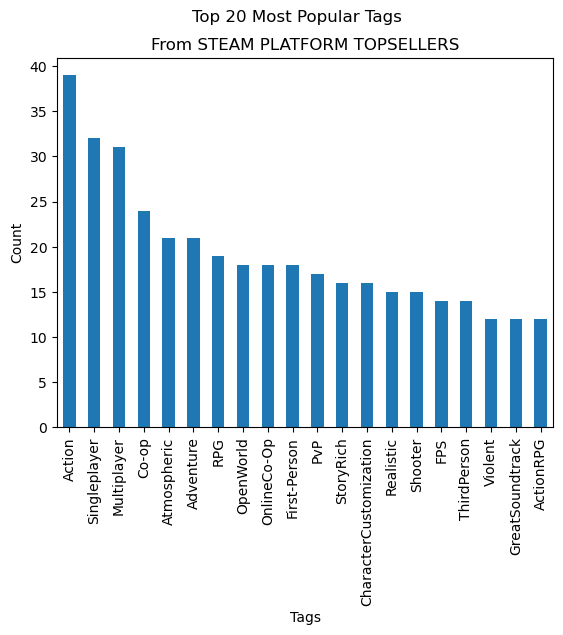

In [41]:
# Plot the 20 MOST POPULAR TAGS:

# Extract the top 20 most popular tags:
top_20_tags = tag_counts.head(20)

# Plot the top 20 tags using a bar plot:
top_20_tags.plot(kind="bar")
plt.suptitle("Top 20 Most Popular Tags")
plt.title("From STEAM PLATFORM TOPSELLERS")
plt.xlabel("Tags")
plt.ylabel("Count")
plt.show()

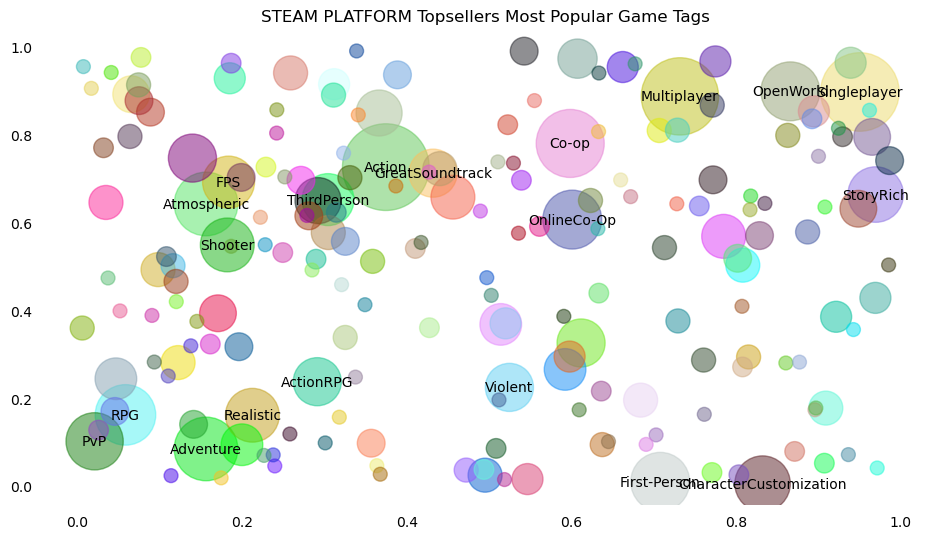

In [42]:
# Now we will create a graph with stains; like bubbles; in which each bubble represents
# a tag, and the popularity is represented by the size of the bubble:

# Generates a random seed to put the bubbles in random places:
np.random.seed(42)

# WE WILL PLOT ON X, Y ALL THE TAGS:
x = np.random.rand(len(tag_counts))
y = np.random.rand(len(tag_counts))

# It will takes random colors for each bubble:
colors = np.random.rand(len(tag_counts), 3)

# Create a figure and axes:
fig, ax = plt.subplots(figsize=(9.5, 5.5))

# Plot the circular stains:
scatter = ax.scatter(x, y, s=tag_counts.values * 100, c=colors, alpha=0.5)

# Add tag names as annotations to each bubble;
# Puts labels only for the 20 most popular:
for i, tag in enumerate(tag_counts.head(20).index):
    ax.text(x[i], y[i], tag, ha="center", va="center")

# Set labels and title:
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("STEAM PLATFORM Topsellers Most Popular Game Tags")

# Hide spines and ticks:
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.tick_params(bottom=False, left=False)

# Adjust layout:
fig.tight_layout()

# Show the graph:
plt.show()

In [43]:
# DOING JUST THE SAME TO GAME GENRES:
# Lets separate all the genres in a list:
data["genres_string"] = data["genres_string"].astype(str)

# Join and split the genres:
all_genres = " ".join(data["genres_string"]).split()

# Create a Pandas Series with the genres and their respective counts:
genres_counts = pd.Series(all_genres).value_counts()

# Those are THE MOST POPULAR GENRES IN 2023 VIDEOGAMES:
print(genres_counts)

Action                  33
Adventure               20
RPG                     17
Simulation              10
FreetoPlay               8
Strategy                 7
MassivelyMultiplayer     7
Casual                   4
Indie                    4
nan                      3
Sports                   3
dtype: int64


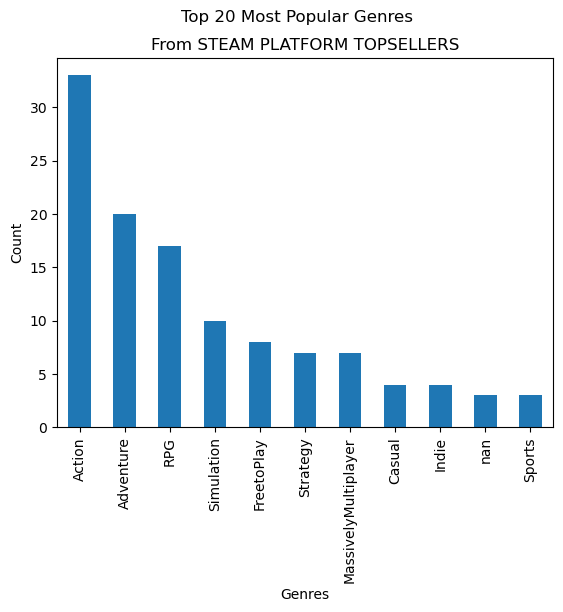

In [44]:
# Plot the 20 MOST POPULAR GENRES:

# Extract the top 20 most popular_genres:
top_20_genres = genres_counts.head(20)

# Plot the top 20_genres using a bar plot:
top_20_genres.plot(kind="bar")
plt.suptitle("Top 20 Most Popular Genres")
plt.title("From STEAM PLATFORM TOPSELLERS")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.show()

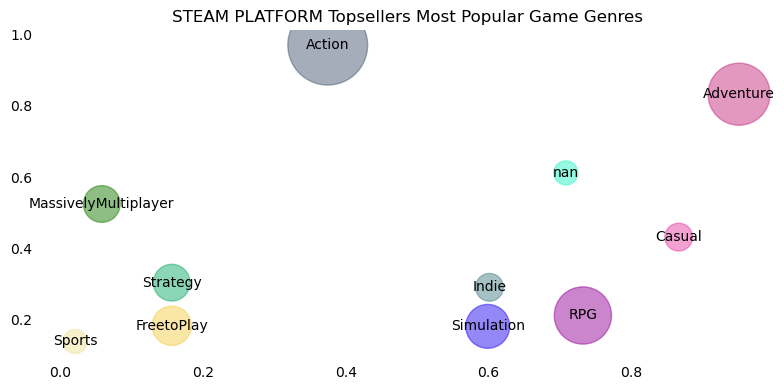

In [45]:
# Now we will create a graph with stains; like bubbles; in which each bubble represents
# a genre, and the popularity is represented by the size of the bubble:

# Generates a random seed to put the bubbles in random places:
np.random.seed(42)

# WI WILL PLOT ON X, Y ALL THE GENRES:
x = np.random.rand(len(genres_counts))
y = np.random.rand(len(genres_counts))

# It will takes random colors for each bubble:
colors = np.random.rand(len(genres_counts), 3)

# Create a figure and axes:
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the circular stains:
scatter = ax.scatter(x, y, s=genres_counts.values * 100, c=colors, alpha=0.5)

# Add genre names as annotations to each bubble:
for i, genre in enumerate(genres_counts.index):
    ax.text(x[i], y[i], genre, ha="center", va="center")

# Set labels and title:
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("STEAM PLATFORM Topsellers Most Popular Game Genres")

# Hide spines and ticks:
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.tick_params(bottom=False, left=False)

# Adjust layout:
fig.tight_layout()

# Show the graph:
plt.show()